In [13]:
import os
import glob
import gpxpy
import requests

import pandas as pd

from itertools import chain

import matplotlib.pyplot as plt
import contextily as ctx

In [20]:
def osrm_format(coords):
    lat, lon = coords
    return f"{lon},{lat}"

def get_duration(points):
    points = ';'.join(map(osrm_format, points))
    params = {}
    
    response = requests.get(f"http://127.0.0.1:9000/table/v1/foot/{points}", params=params)
    result = response.json()
    
    if result['code'] != 'Ok':
        print(result)
        return None
    
    durations = result['durations']
    durations = list(chain.from_iterable(durations))
    
    total_duration = 0
    for i in range(len(durations)):
        total_duration += durations[i]
    
    print(total_duration / 3600)

def parse_gpx(filepath):
    gpx_file = open(filepath, 'r')
    gpx = gpxpy.parse(gpx_file)

    data = []

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                lat, lon = point.latitude, point.longitude,
                data.append({
                  'lat': lat, 
                  'lon': lon,
                })

    df = pd.DataFrame(data)

    return df 

def plot_gpx(df, ax, color, label):
    ax.plot(df['lon'], df['lat'], color=color, label=label)
    ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
    ax.legend()
    ax.set_yticks([])
    ax.set_xticks([])
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

24542.567000000174


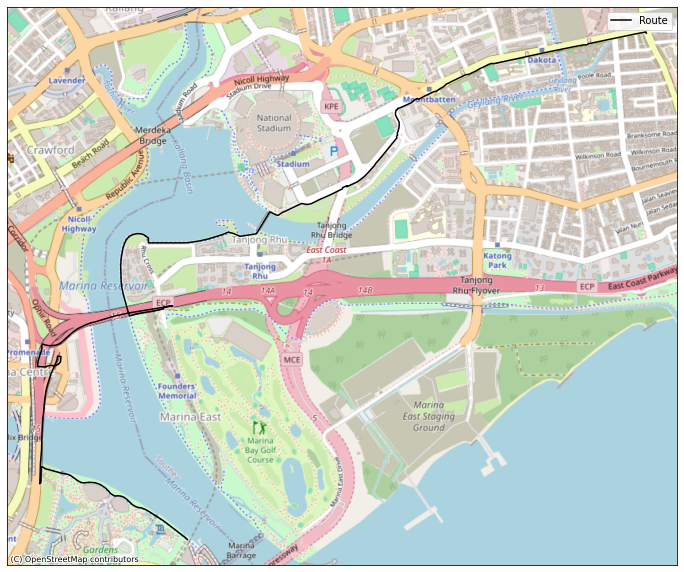

In [22]:
df = parse_gpx('../routes/osrm-route.gpx')

points = list(zip(df['lat'].tolist(), df['lon'].tolist()))
get_duration(points)

fig, ax = plt.subplots(1, 1, figsize=(12, 30))
plot_gpx(df, ax, 'black', 'Route')
plt.show()